In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

##### Consistent estimator

In [2]:
# Create 10 samples from N(1, 2)
# MLE for mean is sample mean
X = [np.random.normal(loc = 1, scale = math.sqrt(2)) for _ in range(10)]
sample_mean = sum(X) / 10
print(sample_mean)

1.1051259752170346


In [3]:
# Do the same thing 500 times and get the 2.5% lower and upper quantile out of all estimations
sample_mean_list = []
for i in range(500):
    X = [np.random.normal(loc = 1, scale = math.sqrt(2)) for _ in range(10)]
    sample_mean = sum(X) / 10
    sample_mean_list.append(sample_mean)
print("2.5% quantile: {}".format(np.quantile(sample_mean_list, 0.025)))
print("97.5% quantile: {}".format(np.quantile(sample_mean_list, 0.975)))

2.5% quantile: 0.1143948089504456
97.5% quantile: 1.87633978450148


In [4]:
# Do the same thing for different sample size
size = [10, 40, 90, 160, 250, 360]
q_2_5 = []
q_97_5 = []

for sz in size:
    sample_mean_list = []
    for i in range(500):
        X = [np.random.normal(loc = 1, scale = math.sqrt(2)) for _ in range(sz)]
        sample_mean = sum(X) / sz
        sample_mean_list.append(sample_mean)
    q_2_5.append(np.quantile(sample_mean_list, 0.025))
    q_97_5.append(np.quantile(sample_mean_list, 0.975))
    
print(q_2_5)
print(q_97_5) # Checking

[0.20213422178782436, 0.5294389280120705, 0.7458030252007565, 0.7598840715539642, 0.8448649171195481, 0.8461244442292342]
[1.8867367262234067, 1.4388458883255388, 1.3062333215780326, 1.2097409923497784, 1.1879302065763846, 1.1371438917469479]


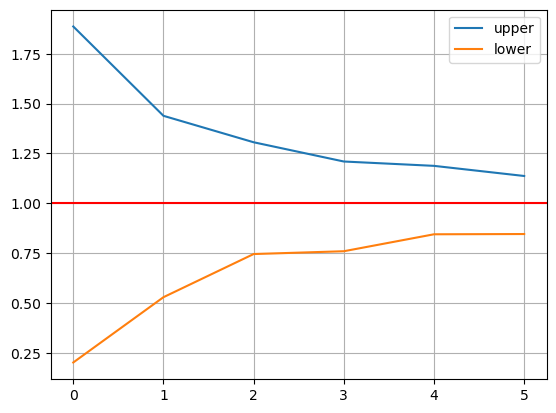

In [5]:
# Plotting
x = np.arange(0, 6)
plt.plot(x, q_97_5, label = 'upper')
plt.plot(x, q_2_5, label = 'lower')

plt.axhline(1, color = 'red')
plt.grid()

plt.xticks(x)

plt.legend()

Observation: As the sample size increases, the upper and lower quantiles of the estimations get closer and closer to the true value. Or, the estimation is getting more precise with bigger sample. This is supported by the fact that sample mean is a consistant estimator of normal mean.

##### T - statistics follows normal distribution under $H_0: \theta = \theta_0$ with X follows Exp($\theta$)

In [6]:
# Creating 100 samples from Exp(2)
data = [np.random.exponential(2) for _ in range(100)]

In [7]:
def exp(x, scale = 2):
    return 1/scale * math.exp(-1/scale * x)

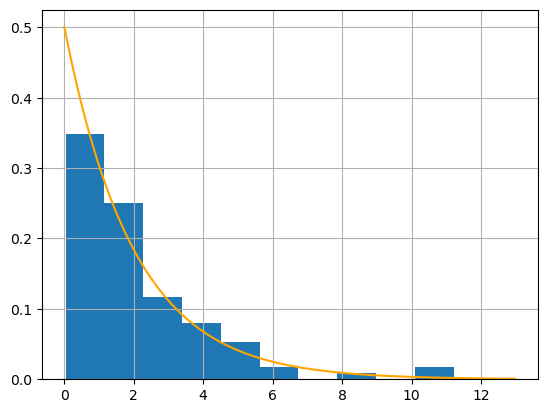

In [8]:
xx = np.arange(0, math.floor(max(data)) + 2, 0.01)
yy = [exp(_) for _ in xx]

plt.grid()
plt.hist(data, bins = 10, density = True)
plt.plot(xx, yy, color = 'orange')

In [9]:
# Calculate sample mean, sample variance and T-statistics
s_mean = sum(data) / len(data)
s_var  = sum([(x - s_mean) ** 2 for x in data]) / len(data)
T_stat = (s_mean - 2) * math.sqrt(len(data)) / math.sqrt(s_var)

print("Sample mean: {}".format(s_mean))
print("Sample variance: {}".format(s_var))
print("T-statistics: {}".format(T_stat))

Sample mean: 2.1561096216273223
Sample variance: 4.126587371743204
T-statistics: 0.768482794742822


In [10]:
# Repeat the same process 1000 times
T = []
for _ in range(1000):
    data = [np.random.exponential(2) for _ in range(100)]
    s_mean = sum(data) / len(data)
    s_var  = sum([(x - s_mean) ** 2 for x in data]) / len(data)
    T_stat = (s_mean - 2) * math.sqrt(len(data)) / math.sqrt(s_var)
    T.append(T_stat)

In [11]:
def std_normal(x):
    return 1 / math.sqrt(2 * math.pi) * math.exp(-x**2 / 2)

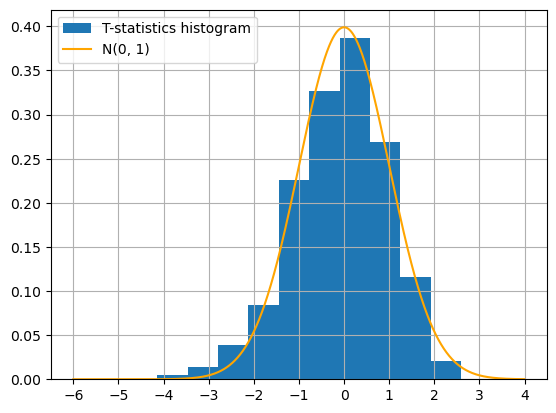

In [12]:
left = math.floor(min(T)) - 1
right = math.floor(max(T)) + 2

xx = np.arange(left, right, 0.01)
yy = [std_normal(_) for _ in xx]

plt.grid()
plt.xticks(np.arange(left, right + 1, 1))
plt.hist(T, bins = 10, density = True, label = "T-statistics histogram")
plt.plot(xx, yy, color = 'orange', label = "N(0, 1)")

plt.legend()